In [ ]:
from google.colab import files
up_data=files.upload()

Saving data (6).xls to data (6).xls


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax

In [ ]:
df=pd.read_excel("data (6).xls")
data=pd.DataFrame(df)
data

,F(mL/mn),t(mn),CO2 selectivity (%),H2/CO ratio,E reformage (kJ/min)
0,x1,x2,y1,y2,y3
1,300,0,2.612023,8.608754,55.598882
2,300,3,17.78595,3.61434,55.598882
3,300,6,7.186041,3.282391,55.598882
4,300,9,8.058988,3.38442,55.598882
...,...,...,...,...,...
144,1000,96,12.949414,3.629843,56.120186
145,1000,99,12.899311,4.881199,56.120186
146,1000,102,13.050234,3.713186,56.120186
147,1000,105,12.965136,3.601106,56.120186


In [ ]:
# === 2. Nettoyage ===
data= data.iloc[1:, :]
data = data.apply(pd.to_numeric, errors="coerce")
data = data.dropna()

In [ ]:
data.head()

,F(mL/mn),t(mn),CO2 selectivity (%),H2/CO ratio,E reformage (kJ/min)
1,300,0,2.612023,8.608754,55.598882
2,300,3,17.785950,3.614340,55.598882
3,300,6,7.186041,3.282391,55.598882
4,300,9,8.058988,3.384420,55.598882
5,300,12,7.673889,3.439428,55.598882


Le graphique a été sauvegardé avec succès sous le nom 'analyse_boites_a_moustaches.png'


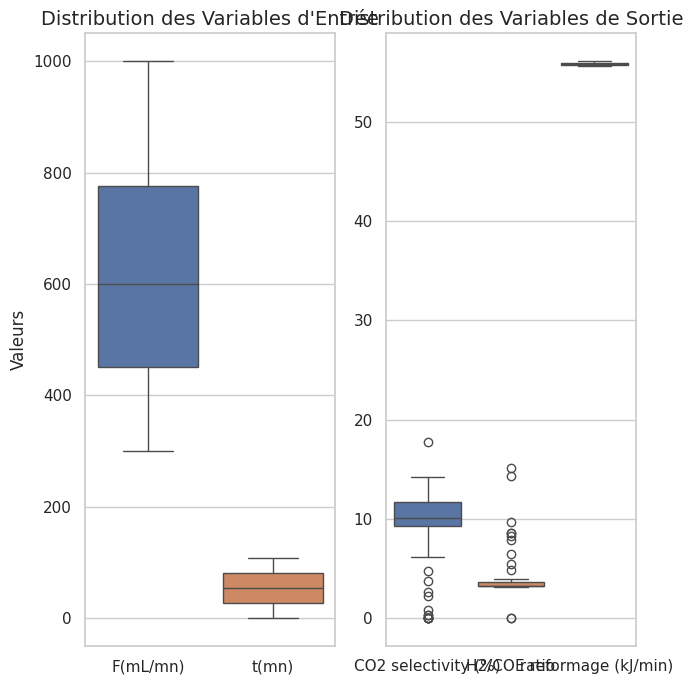

In [ ]:
# Étape 1 : Importer les librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 2 : Charger votre fichier de données
# Assurez-vous que votre fichier "data.xls - DATA1.csv" est dans le même dossier que votre script.
try:

    # On saute la deuxième ligne (x1, x2, ...) qui n'est pas une donnée numérique
    df = data

    # Étape 3 : Séparer les variables pour une meilleure clarté
    input_vars = ['F(mL/mn)', 't(mn)']
    output_vars = ['CO2 selectivity (%)', 'H2/CO ratio', 'E reformage (kJ/min)']

    # Étape 4 : Créer les graphiques
    # Configurer le style
    sns.set(style="whitegrid")
    plt.figure(figsize=(7, 7))

    # Graphique pour les variables d'entrée
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[input_vars])
    plt.title("Distribution des Variables d'Entrée", fontsize=14)
    plt.ylabel("Valeurs")

    # Graphique pour les variables de sortie
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[output_vars])
    plt.title("Distribution des Variables de Sortie", fontsize=14)

    # Ajuster et sauvegarder le graphique
    plt.tight_layout()
    plt.savefig('analyse_boites_a_moustaches.png')

    print("Le graphique a été sauvegardé avec succès sous le nom 'analyse_boites_a_moustaches.png'")

except FileNotFoundError:
    print(f"Erreur : Le fichier '{file_path}' n'a pas été trouvé. Veuillez vérifier le nom et l'emplacement du fichier.")

In [ ]:


print(f"Taille du dataset avant suppression des outliers : {data.shape}")
print("-" * 50)
data_sans_outliers = data.copy()

for column in data_sans_outliers.select_dtypes(include='number').columns:

    # 1. Calcul des bornes (méthode IQR)
    Q1 = data_sans_outliers[column].quantile(0.25)
    Q3 = data_sans_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2. Identification des outliers
    outliers = data_sans_outliers[(data_sans_outliers[column] < lower_bound) | (data_sans_outliers[column] > upper_bound)]

    # 3. Affichage du nombre d'outliers trouvés
    if not outliers.empty:
        print(f"Nombre de valeurs aberrantes pour '{column}' : {len(outliers)}")
    data_sans_outliers = data_sans_outliers[(data_sans_outliers[column] >= lower_bound) & (data_sans_outliers[column] <= upper_bound)]

print("-" * 50)
print(f"Taille du dataset après suppression des outliers : {data_sans_outliers.shape}")
print(f"{data.shape[0] - data_sans_outliers.shape[0]} lignes ont été supprimées.")

# On remplace l'ancien dataframe par le nouveau, nettoyé des outliers
data = data_sans_outliers


Taille du dataset avant suppression des outliers : (148, 5)
--------------------------------------------------
Nombre de valeurs aberrantes pour 'CO2 selectivity (%)' : 14
Nombre de valeurs aberrantes pour 'H2/CO ratio' : 1
--------------------------------------------------
Taille du dataset après suppression des outliers : (133, 5)
15 lignes ont été supprimées.


In [ ]:

X = data[['F(mL/mn)', 't(mn)']]
targets = ['CO2 selectivity (%)', 'H2/CO ratio', 'E reformage (kJ/min)']

# === 4. Standardisation ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 5. Split train/test ===
X_train, X_test, y_train_full, y_test_full = train_test_split(
    X_scaled, data[targets], test_size=0.3, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
rf_clf = RandomForestRegressor(
    n_estimators=300,      # nombre d’arbres
    max_depth=None,        # laisse les arbres se développer librement
    min_samples_split=2,
    random_state=42,
    n_jobs=-1              # utilise tous les cœurs CPU pour accélérer
)
rf_clf.fit(X_train, y_train_full['CO2 selectivity (%)'])
y_pred = rf_clf.predict(X_test)
rmse=mean_squared_error(y_test_full['CO2 selectivity (%)'], y_pred)
print(rmse)

0.5585162944190166


In [ ]:
def RFregressor(n,p,q):
  rf_clf = RandomForestRegressor(
    n_estimators=n,      # nombre d’arbres
    max_depth=q,        # laisse les arbres se développer librement
    min_samples_split=p,
    random_state=42,
    n_jobs=-1              # utilise tous les cœurs CPU pour accélérer
  )


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# 2. Définir le modèle
rf = RandomForestRegressor(random_state=42)

# 3. Définir l’espace de recherche des hyperparamètres
param_dist = {
    'n_estimators': [100, 300, 500], # augmenter n au de la de 500 ne change pas la performance du model
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

# 4. Définir la stratégie de validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Lancer la recherche aléatoire
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,          # nombre de combinaisons testées
    scoring='neg_mean_squared_error',  # métrique de scoring mse
    cv=cv,
    n_jobs=-1,          # utiliser tous les cœurs
    random_state=42,
    verbose=2
)

search.fit(X_train, y_train_full['CO2 selectivity (%)'])

# 6. Meilleurs paramètres trouvés
print("🚀 Meilleurs paramètres trouvés :")
print(search.best_params_)

# 7. Score moyen obtenu pendant la cross-validation
print(f"Score CV (RMSE moyen) : {-search.best_score_:.4f}")

# 8. Évaluer sur le jeu de test
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test_full['CO2 selectivity (%)'], y_pred))
mse=mean_squared_error(y_test_full['CO2 selectivity (%)'], y_pred)
r2 = r2_score(y_test_full['CO2 selectivity (%)'], y_pred)
print(f"📊 RMSE Test = {rmse:.3f}")
print(f"📈 R² Test   = {r2:.3f}")
print(f"📈 MSE Test    = {mse:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🚀 Meilleurs paramètres trouvés :
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Score CV (RMSE moyen) : 0.8965
📊 RMSE Test = 0.724
📈 R² Test   = 0.794
📈 MSE Test    = 0.524


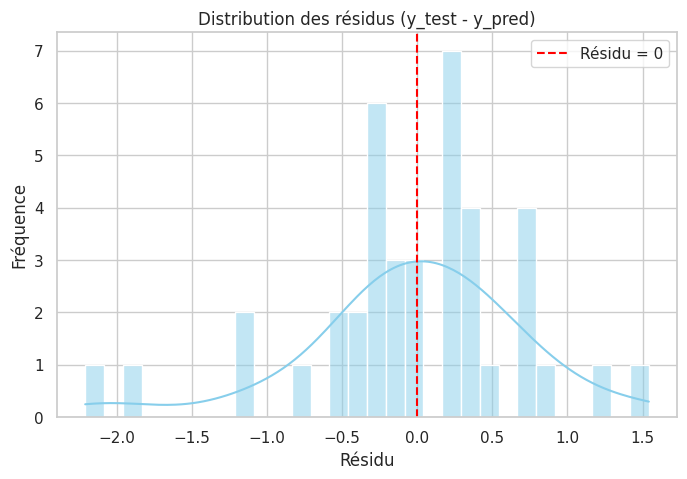

In [ ]:
residuals=y_test_full['CO2 selectivity (%)']-y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--', label='Résidu = 0')
plt.title("Distribution des résidus (y_test - y_pred)")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()


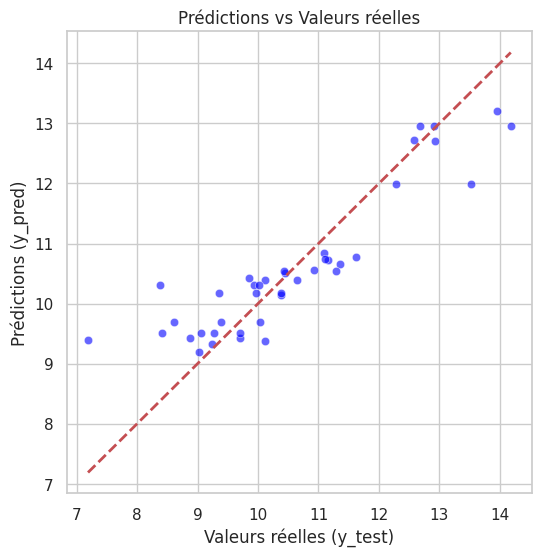

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_full['CO2 selectivity (%)'], y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test_full['CO2 selectivity (%)'].min(), y_test_full['CO2 selectivity (%)'].max()], [y_test_full['CO2 selectivity (%)'].min(), y_test_full['CO2 selectivity (%)'].max()], 'r--', lw=2)  # ligne 45°
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Prédictions vs Valeurs réelles")
plt.grid(True)
plt.show()


In [ ]:
 ## pour H2/CO


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# 2. Définir le modèle
rf = RandomForestRegressor(random_state=42)

# 3. Définir l’espace de recherche des hyperparamètres
param_dist = {
    'n_estimators': [100, 300, 500], # augmenter n au de la de 500 ne change pas la performance du model
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

# 4. Définir la stratégie de validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Lancer la recherche aléatoire
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,          # nombre de combinaisons testées
    scoring='neg_mean_squared_error',  # métrique de scoring mse
    cv=cv,
    n_jobs=-1,          # utiliser tous les cœurs
    random_state=42,
    verbose=2
)

search.fit(X_train, y_train_full['H2/CO ratio'])

# 6. Meilleurs paramètres trouvés
print("🚀 Meilleurs paramètres trouvés :")
print(search.best_params_)

# 7. Score moyen obtenu pendant la cross-validation
print(f"Score CV (RMSE moyen) : {-search.best_score_:.4f}")

# 8. Évaluer sur le jeu de test
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test_full['H2/CO ratio'], y_pred))
mse=mean_squared_error(y_test_full['H2/CO ratio'], y_pred)
r2 = r2_score(y_test_full['H2/CO ratio'], y_pred)
print(f"📊 RMSE Test = {rmse:.3f}")
print(f"📈 R² Test   = {r2:.3f}")
print(f"📈 MSE Test    = {mse:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🚀 Meilleurs paramètres trouvés :
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 30, 'bootstrap': True}
Score CV (RMSE moyen) : 0.0046
📊 RMSE Test = 0.064
📈 R² Test   = 0.853
📈 MSE Test    = 0.004


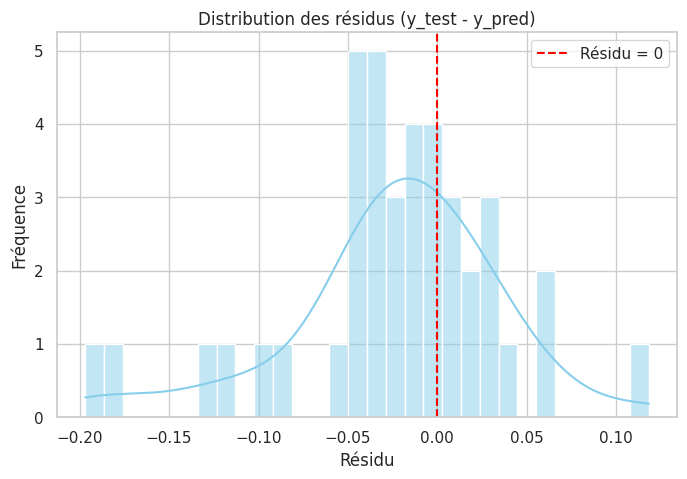

In [ ]:
residuals=y_test_full['H2/CO ratio']-y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--', label='Résidu = 0')
plt.title("Distribution des résidus (y_test - y_pred)")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()


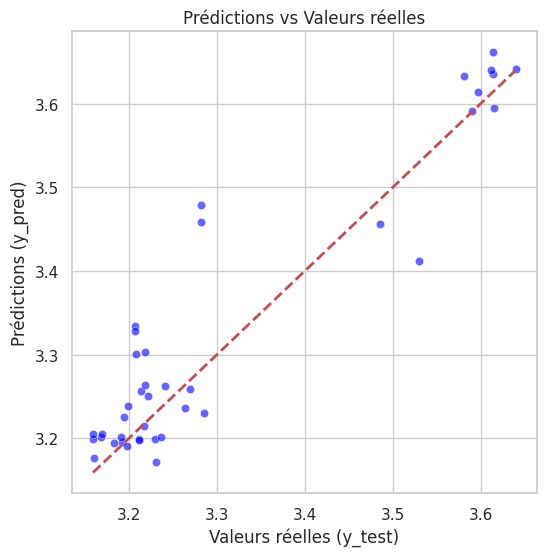

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_full['H2/CO ratio'], y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test_full['H2/CO ratio'].min(), y_test_full['H2/CO ratio'].max()], [y_test_full['H2/CO ratio'].min(), y_test_full['H2/CO ratio'].max()], 'r--', lw=2)  # ligne 45°
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Prédictions vs Valeurs réelles")
plt.grid(True)
plt.show()
